In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\SREEJA\Downloads\HDB.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Returns
0,16-10-2017,49.330002,49.645000,48.009998,48.264999,46.964260,1696800,NaN
1,17-10-2017,48.130001,48.334999,47.244999,47.299999,46.025269,1793200,-1.999374
2,18-10-2017,48.060001,48.195000,47.435001,47.634998,46.351238,1940000,0.708239
3,19-10-2017,47.340000,47.830002,46.884998,47.779999,46.492329,1066800,0.304395
4,20-10-2017,47.910000,48.169998,47.615002,48.000000,46.706398,1119600,0.460439


In [3]:
df1 = df.reset_index()["Close"]

In [4]:
df1

0       48.264999
1       47.299999
2       47.634998
3       47.779999
4       48.000000
          ...    
1254    57.599998
1255    56.470001
1256    56.869999
1257    57.650002
1258    57.970001
Name: Close, Length: 1259, dtype: float64

In [5]:
df1.shape

(1259,)

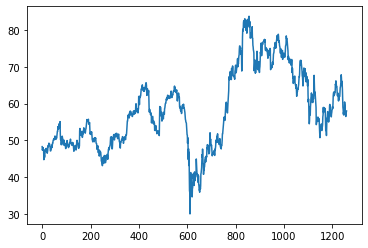

In [6]:
plt.plot(df1)

In [7]:
# LSTM are very sensitive to the scale of the data.
# So we apply MinMax Scaler to transform our values between 0 to 1
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1)) # to provide input to fit_transform

In [8]:
df1.shape


(1259, 1)

In [9]:
# All values are transformed between 0 to 1 after applying MinMax
df1

array([[0.34030488],
       [0.32236475],
       [0.32859265],
       ...,
       [0.50027885],
       [0.51477975],
       [0.52072879]])

In [10]:
# DATASET PREPROCESSING
# Train and Test Split
training_size = int(len(df1)*0.65) # 65% training data size
test_size = len(df1) - training_size # 35% test data size

In [11]:
training_size,test_size 

(818, 441)

In [12]:
# Till 803th it will get stored under train_data
# Remaining data will get stored under test_data
train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [13]:
len(train_data) # checking the size

818

In [14]:
len(test_data) # checking the size

441

In [15]:
# convert an array of values into a dataset matrix
def create_dataset(dataset,time_step=1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_step-1): # traversing through the dataset
        a = dataset[i:(i+time_step),0] # based on our time step we are putting data into x and y
        dataX.append(a)
        dataY.append(dataset[i + time_step,0])
    return np.array(dataX),np.array(dataY)

In [16]:
time_step = 100
X_train,y_train = create_dataset(train_data,time_step)
X_test, ytest = create_dataset(test_data,time_step)

In [17]:
print(X_train)

[[0.34030488 0.32236475 0.32859265 ... 0.33073063 0.33138131 0.33900354]
 [0.32236475 0.32859265 0.33128834 ... 0.33138131 0.33900354 0.34885664]
 [0.32859265 0.33128834 0.33537834 ... 0.33900354 0.34885664 0.35183117]
 ...
 [0.32738428 0.32031976 0.33017293 ... 0.7588771  0.78081426 0.79847563]
 [0.32031976 0.33017293 0.3428147  ... 0.78081426 0.79847563 0.80423873]
 [0.33017293 0.3428147  0.36716861 ... 0.79847563 0.80423873 0.83379807]]


In [18]:
print(X_test)

[[0.83509941 0.83565726 0.84104847 ... 0.87302469 0.8735824  0.8791597 ]
 [0.83565726 0.84104847 0.80832873 ... 0.8735824  0.8791597  0.87897375]
 [0.84104847 0.80832873 0.82338725 ... 0.8791597  0.87897375 0.88306375]
 ...
 [0.42647337 0.4216397  0.44320505 ... 0.54712771 0.51106156 0.51385013]
 [0.4216397  0.44320505 0.44023052 ... 0.51106156 0.51385013 0.49284256]
 [0.44320505 0.44023052 0.45157093 ... 0.51385013 0.49284256 0.50027885]]


In [19]:
print(X_test.shape),print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [20]:
print(X_train.shape),print(y_train.shape)

(717, 100)
(717,)


(None, None)

In [21]:
# We need to convert this into 3D for LSTM
# reshape input to be [samples,time steps,features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)  #samples,time steps,features
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [22]:
X_train.shape


(717, 100, 1)

In [23]:
# Create LSTM MODEL
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [24]:
# Stacked LSTM MODEL (1 lstm after another)
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Fit X_train,y_train and validation_data
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 10s 289ms/step - loss: 0.0734 - val_loss: 0.0129
Epoch 2/100
12/12 [==============================] - 2s 151ms/step - loss: 0.0103 - val_loss: 0.0062
Epoch 3/100
12/12 [==============================] - 3s 223ms/step - loss: 0.0063 - val_loss: 0.0173
Epoch 4/100
12/12 [==============================] - 3s 246ms/step - loss: 0.0053 - val_loss: 0.0060
Epoch 5/100
12/12 [==============================] - 3s 241ms/step - loss: 0.0042 - val_loss: 0.0041
Epoch 6/100
12/12 [==============================] - 3s 234ms/step - loss: 0.0035 - val_loss: 0.0037
Epoch 7/100
12/12 [==============================] - 3s 226ms/step - loss: 0.0032 - val_loss: 0.0035
Epoch 8/100
12/12 [==============================] - 3s 235ms/step - loss: 0.0030 - val_loss: 0.0037
Epoch 9/100
12/12 [==============================] - 3s 233ms/step - loss: 0.0027 - val_loss: 0.0036
Epoch 10/100
12/12 [==============================] - 3s 222ms/step - loss: 0.0025 - val_l

In [27]:
import tensorflow as tf

In [28]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 40ms/step


In [29]:
##Transform back to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)


In [30]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

53.94166829271979

In [31]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

66.28508692974285

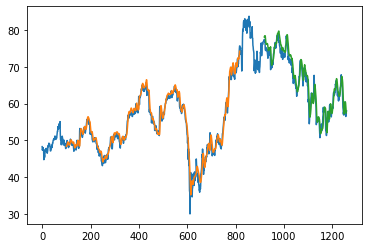

In [32]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()



In [33]:
len(test_data)


441

In [39]:
# Taking last 100 days data to predict the future
x_input = test_data[341:].reshape(1,-1)
x_input.shape


(1, 100)

In [40]:
# Converting this into a list
temp_input=list(x_input)
temp_input=temp_input[0].tolist()



In [41]:
# All data from test_data displayed for prev 100 days
temp_input


[0.4515709341593058,
 0.49061161013921517,
 0.5004647982810039,
 0.5387618416292649,
 0.513292442586123,
 0.5270496648624342,
 0.5382041357463442,
 0.5276073707453547,
 0.5270496648624342,
 0.5292805441665634,
 0.533928248114366,
 0.5212864933763434,
 0.4723926292546453,
 0.4218256660750016,
 0.4225692429342026,
 0.4253578838936999,
 0.3965421380081401,
 0.4372560060000742,
 0.48373304547809914,
 0.47759811344863146,
 0.49470162679491303,
 0.5177542569668291,
 0.49972114705853976,
 0.46848857652930687,
 0.4759249214366067,
 0.4647703947802492,
 0.47499532487459895,
 0.48057262538440926,
 0.5051125022288064,
 0.5486150111802378,
 0.5540062919872414,
 0.5454545353141004,
 0.5337423027748224,
 0.5073433815329359,
 0.5030674939009575,
 0.5212864933763434,
 0.4907975740695746,
 0.5060420244275511,
 0.5138501298782278,
 0.5263060136399701,
 0.5326269095997972,
 0.5426659687178664,
 0.5326269095997972,
 0.5575386027600185,
 0.5971370589861115,
 0.6105223905833354,
 0.6157278747773215,
 0.5971

In [42]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100): # as we are getting 101 records We are shifting the dataset by 1
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else: # reshape and pass the 100 days data and predicting
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)


[0.5031075]
101
1 day input [0.49061161 0.5004648  0.53876184 0.51329244 0.52704966 0.53820414
 0.52760737 0.52704966 0.52928054 0.53392825 0.52128649 0.47239263
 0.42182567 0.42256924 0.42535788 0.39654214 0.43725601 0.48373305
 0.47759811 0.49470163 0.51775426 0.49972115 0.46848858 0.47592492
 0.46477039 0.47499532 0.48057263 0.5051125  0.54861501 0.55400629
 0.54545454 0.5337423  0.50734338 0.50306749 0.52128649 0.49079757
 0.50604202 0.51385013 0.52630601 0.53262691 0.54266597 0.53262691
 0.5575386  0.59713706 0.61052239 0.61572787 0.59713706 0.61591375
 0.60364381 0.61070834 0.61554193 0.61554193 0.65644167 0.6514222
 0.67317342 0.66555126 0.65030679 0.6441718  0.64435775 0.61517009
 0.59806658 0.59936794 0.61145191 0.60959287 0.57705894 0.57148171
 0.58337982 0.57798846 0.59137387 0.59527794 0.59490611 0.61944598
 0.64026775 0.6411972  0.6569995  0.65606991 0.7038483  0.68767424
 0.6499349  0.67131438 0.65848666 0.62985686 0.57928982 0.5393196
 0.52946643 0.50381115 0.51459378 0.

In [43]:
# PLOTTING
day_new=np.arange(1,101) # 100 indexes
day_pred=np.arange(101,131) # taking 30 days as we are predicting 30 days future

In [44]:
len(df1)

1259

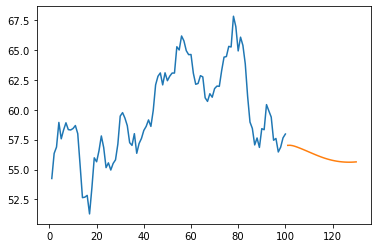

In [45]:
# 1159 to 1259 -- 100 days
# Orange line is showing next 30 days prediction

plt.plot(day_new,scaler.inverse_transform(df1[1159:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))